In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\user\\Datasets\\newplacementdata.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_7704\689824765.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\user\AppData\Local\Temp\ipykernel_7704\689824765.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


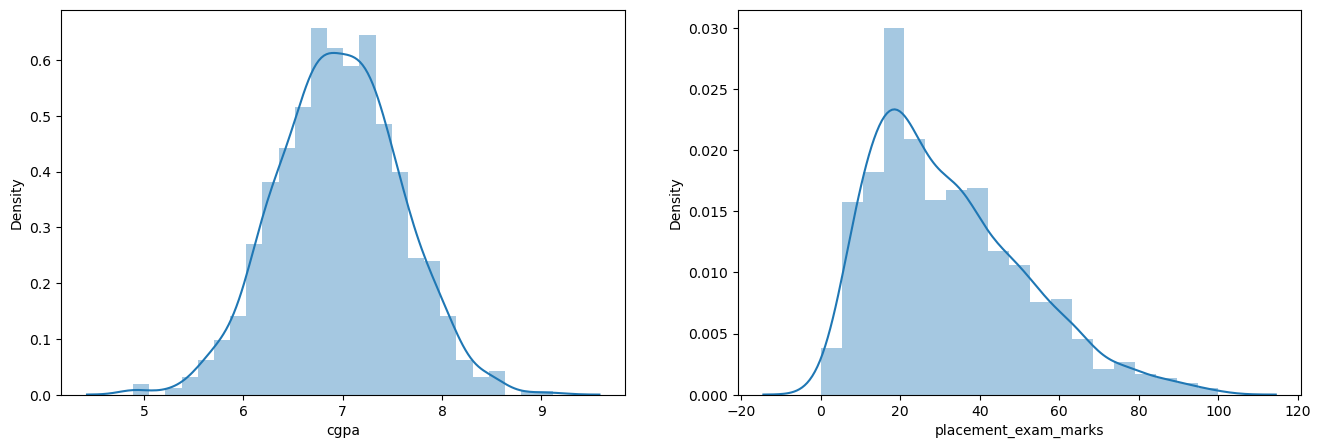

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df['cgpa'])
plt.subplot(122)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [6]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

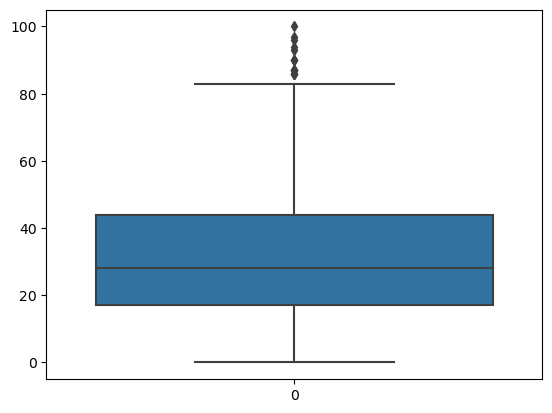

In [7]:
sns.boxplot(df['placement_exam_marks'])

In [8]:
#Finding the IQR
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)


In [9]:
percentile25

17.0

In [10]:
IQR=percentile75-percentile25

In [11]:
IQR

27.0

In [12]:
upper_limit=percentile75+1.5*IQR
upper_limit

84.5

In [13]:
lower_limit=percentile25-1.5*IQR
lower_limit

-23.5

# Finding Outliers

In [14]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [15]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming

In [16]:
newdf=df[df['placement_exam_marks']<upper_limit]
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


C:\Users\user\AppData\Local\Temp\ipykernel_7704\3997220483.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\user\AppData\Local\Temp\ipykernel_7704\3997220483.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['placement_exam_marks'])


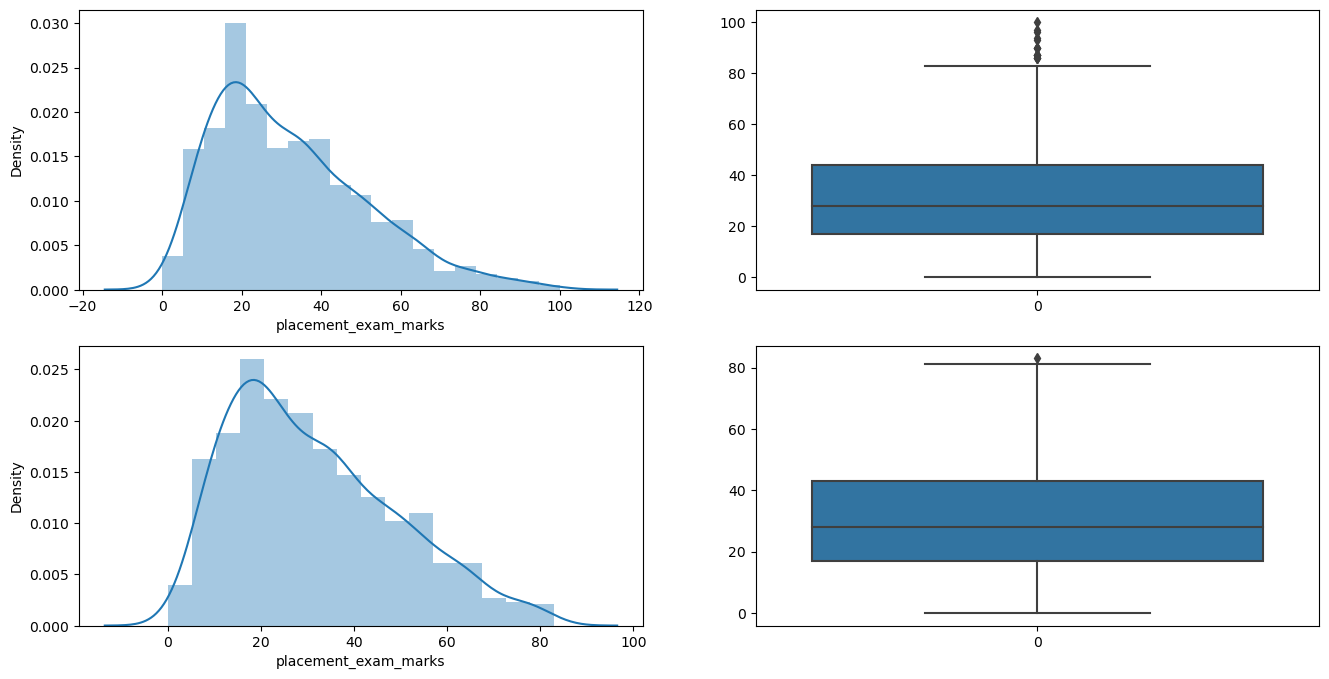

In [17]:
#comparing
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(newdf['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(newdf['placement_exam_marks'])
plt.show()

# Capping

In [18]:
new_df_cap=df.copy()

In [19]:
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [20]:
#np.where(condition,True,False)

In [21]:
new_df_cap.shape

(1000, 3)

C:\Users\user\AppData\Local\Temp\ipykernel_7704\318077032.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\user\AppData\Local\Temp\ipykernel_7704\318077032.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


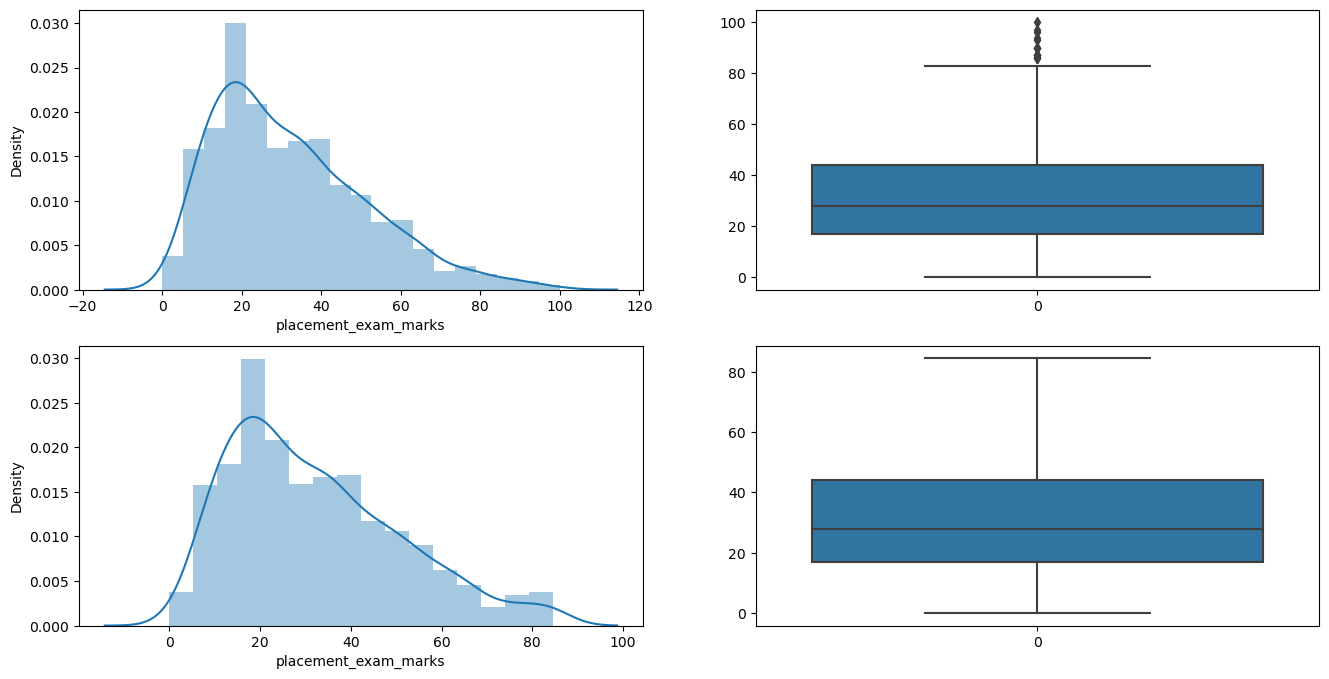

In [22]:
# Comparing 
plt.figure(figsize = (16,8)) 
plt.subplot(221) 
sns.distplot(df['placement_exam_marks']) 

plt.subplot(222) 
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223) 
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(224) 
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show() 

In [23]:
df2=pd.read_csv("C:\\Users\\user\\Datasets\\titanic.csv")
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


C:\Users\user\AppData\Local\Temp\ipykernel_7704\3977781637.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Age'])
C:\Users\user\AppData\Local\Temp\ipykernel_7704\3977781637.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Fare'])


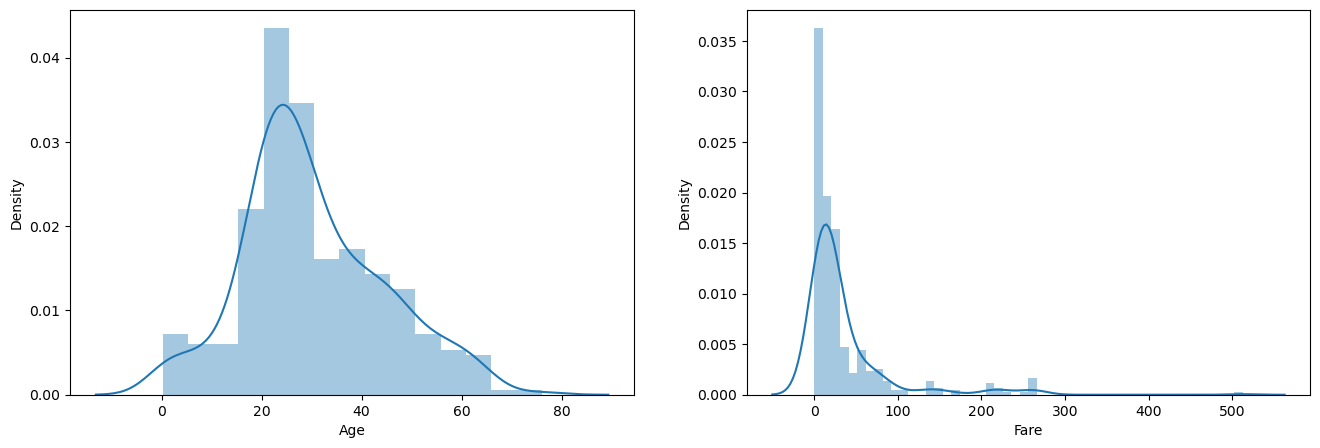

In [39]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df2['Age'])

plt.subplot(122)
sns.distplot(df2['Fare'])
plt.show()

In [25]:
df2['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: >

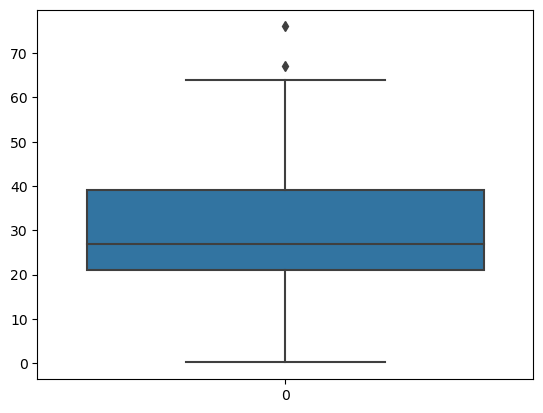

In [26]:
sns.boxplot(df2['Age'])

In [27]:
# Finding the IQR 
percentile25 = df2['Age'].quantile(0.25) 
percentile75 = df2['Age'].quantile(0.75) 

In [28]:
percentile75

39.0

In [29]:
IQR = percentile75-percentile25
IQR

18.0

In [30]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

66.0

In [31]:
lower_limit = percentile25 - 1.5*IQR 
lower_limit

-6.0

In [32]:
df2[df2['Age']>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [33]:
df2[df2['Age']<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Trimming

In [34]:
newdf2 = df2[df2['Age'] < upper_limit]
newdf2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


C:\Users\user\AppData\Local\Temp\ipykernel_7704\2967549190.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Age'])
C:\Users\user\AppData\Local\Temp\ipykernel_7704\2967549190.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf2['Age'])


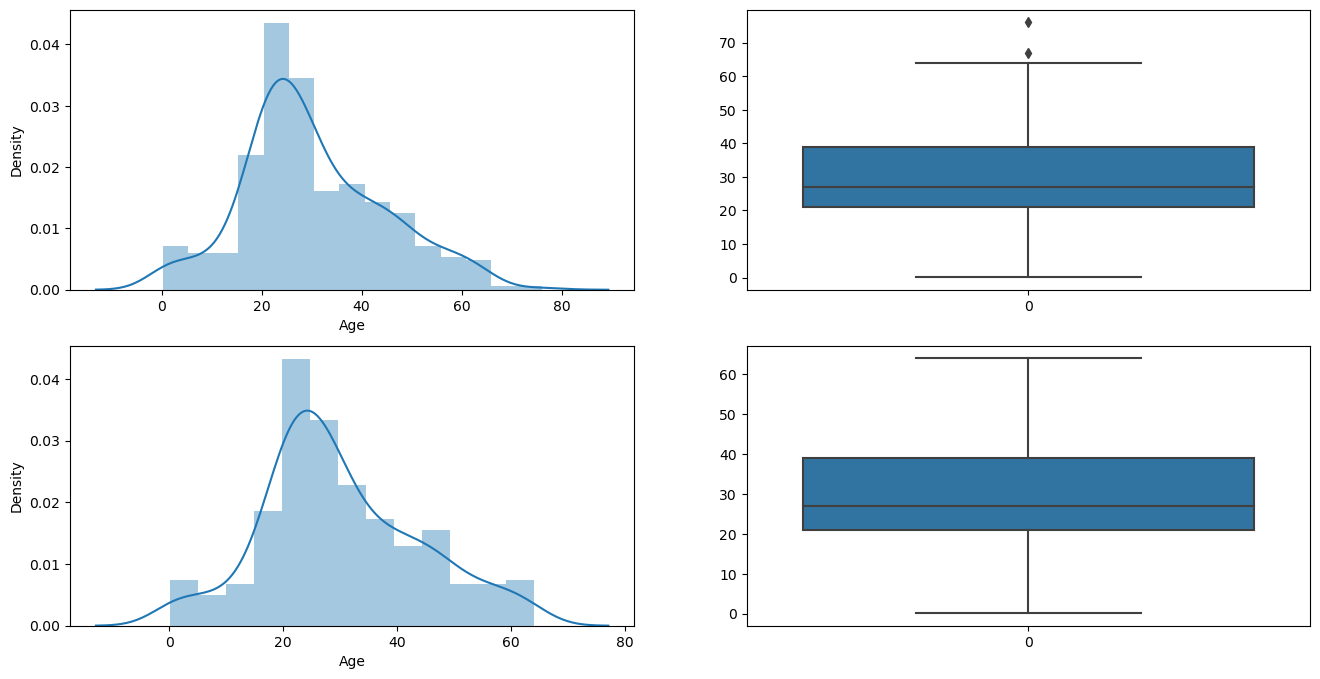

In [35]:
# Comparing 
plt.figure(figsize = (16,8)) 
plt.subplot(221)
sns.distplot(df2['Age'])

plt.subplot(222)
sns.boxplot(df2['Age'])

plt.subplot(223) 
sns.distplot(newdf2['Age'])

plt.subplot(224) 
sns.boxplot(newdf2['Age'])
plt.show()

# Capping

In [36]:
new_df_cap2 = df2.copy()

new_df_cap2['Age'] = np.where(
    new_df_cap2['Age'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap2['Age'] < lower_limit,
        lower_limit,
        new_df_cap2['Age']
    )
)

In [37]:
new_df_cap2.shape

(418, 12)

C:\Users\user\AppData\Local\Temp\ipykernel_7704\3614109539.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Age'])
C:\Users\user\AppData\Local\Temp\ipykernel_7704\3614109539.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap2['Age'])


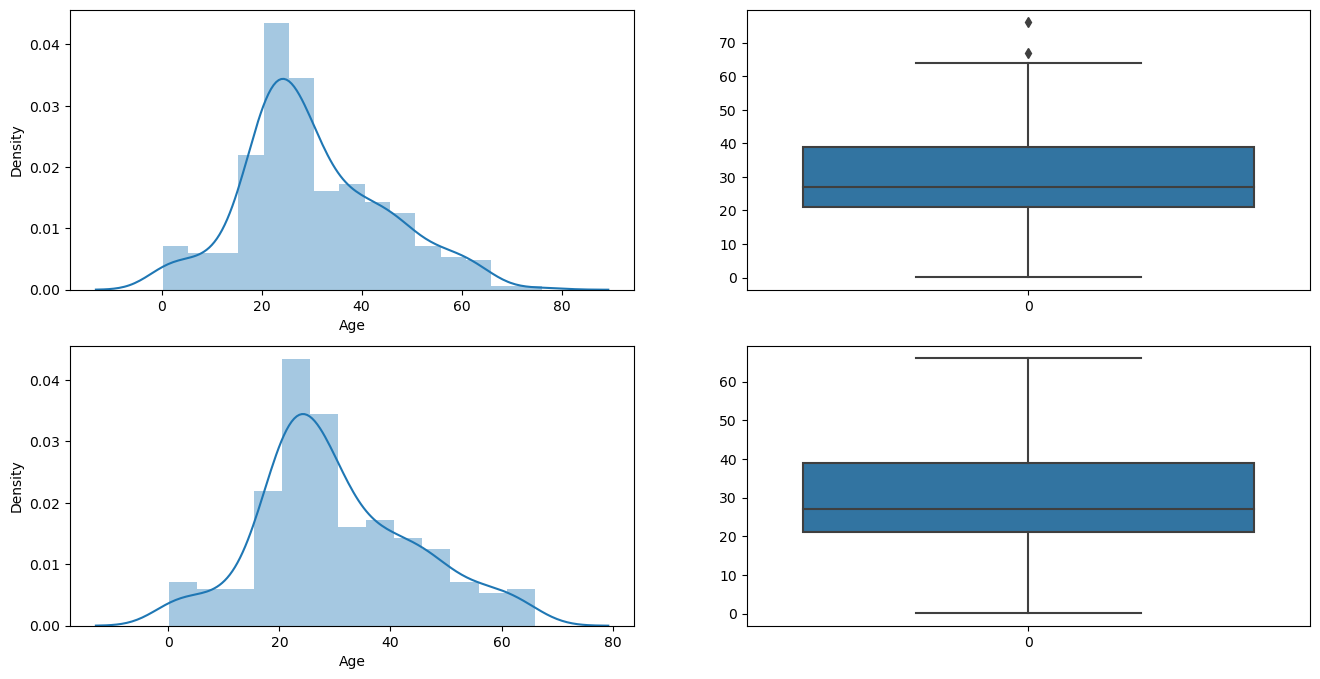

In [38]:
# Comparing 
plt.figure(figsize = (16,8)) 
plt.subplot(221) 
sns.distplot(df2['Age']) 

plt.subplot(222) 
sns.boxplot(df2['Age'])

plt.subplot(223) 
sns.distplot(new_df_cap2['Age'])

plt.subplot(224) 
sns.boxplot(new_df_cap2['Age'])

plt.show() 